# Creating training and testing dataset of neurodegenerative disease data
In this notebook, a numpy dataset will be built from the files previously processed in the last notebook. Each example or data point will consist of a spectrogram of the gait (which is essentially a matrix) signal and a label indicating the disease to which the spectrogram corresponds

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import re

Now the training and test set will be built. One patient (the entire ten segments corresponding to them) from each of the four disease cases will make up the test set.

Besides the first segment of each record will be discarded, since in most cases the signal does not start until later.

In [5]:
np.random.seed(3)

als_test = np.random.randint(1, 14)
control_test = np.random.randint(1, 17)
hunt_test = np.random.randint(1, 21)
park_test = np.random.randint(1, 16)

print('ALS patient for test set:', als_test)
print('Huntington\'s patient for test set:', hunt_test)
print('Parkinson\'s patient for test set:', park_test)
print('Control subject for test set:', control_test)

ALS patient for test set: 11
Huntington's patient for test set: 4
Parkinson's patient for test set: 9
Control subject for test set: 9


In [6]:
test_filenames = ['als'+str(als_test),
                 'hunt'+str(hunt_test),
                 'control'+str(control_test),
                 'park'+str(park_test)]

classes = {
    'control': 0,
    'als': 1,
    'hunt': 2,
    'park': 3}

test_spectrograms = []
test_labels = []
train_spectrograms = []
train_labels = []

rootdir = os.pardir
in_dir = os.path.join(rootdir, 'data/interim/spectrograms')

for in_filename in os.listdir(in_dir):
    if not in_filename.endswith('1.npz'):
        record_name = in_filename.split('_')[0]
        if record_name in test_filenames:
            # load npz file
            data = np.load(os.path.join(in_dir, in_filename))
            # load spectrogram and flip it
            Sxx = data['Sxx']
            Sxx = np.flip(Sxx, 0)
            # append it to list
            test_spectrograms.append(Sxx)
            disease_match = re.match(r'[a-z]+', record_name)
            disease = disease_match[0]
            label = classes[disease]
            test_labels.append(label)
        else:
            # load npz file
            data = np.load(os.path.join(in_dir, in_filename))
            # load spectrogram and flip it
            Sxx = data['Sxx']
            Sxx = np.flip(Sxx, 0)
            # append it to list
            train_spectrograms.append(Sxx)
            disease_match = re.match(r'[a-z]+', record_name)
            disease = disease_match[0]
            label = classes[disease]
            train_labels.append(label)

X_test = np.asarray(test_spectrograms)
Y_test = np.asarray(test_labels)
Y_test = Y_test.reshape((Y_test.shape[0], 1))

X_train = np.asarray(train_spectrograms)
Y_train = np.asarray(train_labels)
Y_train = Y_train.reshape((Y_train.shape[0], 1))

This is a ALS spectrogram


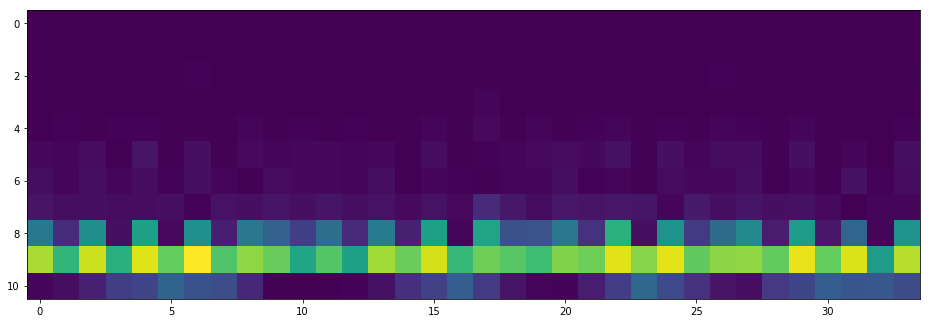

In [27]:
# let's try visualizing the training data once more
diseases_dict = {
    0: 'Control subject',
    1: 'ALS',
    2: 'Huntington\'s disease',
    3: 'Parkinson\'s disease'}

example = np.random.randint(0, Y_train.shape[0])
label = Y_train[example][0]
disease = diseases_dict[label]

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(X_train[example,:,:], interpolation='none')
print('This is a {0} spectrogram'.format(disease))

In [28]:
out_dir = os.path.join(rootdir, 'data/processed')

np.savez(os.path.join(out_dir, 'train.npz'), X_train = X_train, Y_train = Y_train)
np.savez(os.path.join(out_dir, 'test.npz'), X_test = X_test, Y_test = Y_test)